# Build a Blockchain! - Blockchain Design Exercises

## HW1 - Build a Blockchain in Python

#### Getting Started

CS 198-077 Spring 2020 
HW1-Build a Blockchain in Python

Created by Omkar Shanbhag, Updated by Simon Guo

This notebook is meant to be a short introduction to Blockchain implementations, aimed at helping us take the topics we learn about in fundamentals, and seeing how they translate to code. 

In this notebook we will implement various different aspects of Blockchain technology that we understand including: 

- The Blockchain Data Structure using OOP 
- A proof of work simulation 
- Understanding of the concept of difficulty of finding the next block hash 
- A simulation of multiple miners with varying computational powers 
- A bit of data analytics to see if what we've implemented makes sense 

In [2]:
#Import statements
import hashlib as hasher 
import random as rand
import time 
import datetime as date
import ipyparallel as ipp
import numpy as np
import matplotlib.pyplot as plt

# Blockchain Data Structure Design

In this section we will define the class "Block" and create an init function that creates a new block given some parameters, as well as a function hash_block, that computes the hash of this block based on its class variables. 

The init function is implemented for you below and creates a block with the following specifications 
- Index --> the index of the block on the chain (zero indexed)
- Timestamp --> time that the block was added on to the chain
- data --> The data the block contains (Usually points to root of merkel tree, but we can fill it with whatever for this)
- previous_hash --> The hash value of the previous block 
- hash --> hash of this block computed using the hash_block function
- nonce --> the variable value that we change to alter the hash output (Default value = 0, irrelevant in this section)

****QUESTION #1: Implement hash_block()****

We need to implement the hash_block() which computes the hash value of this block based on how we initialize it. This function takes in no parameters. 

Desired Functionality:
- Concatenate string representations of all the class variables 
- Computes the SHA256 hash of this concatenation 

-- HINTS --

- use the first import statement!!! 
- initialize a new hasher
- Look into the following words 
    - utf-8 encoding 
    - .update() function 
    - .hexdigest() function
    - In order for the test function below to work properly, create the string concatenation in the following order with no spaces or any other characters in between 
       - index
       - timestamp
       - data
       - previous block hash
       - nonce
     - If you want to do it another order that incorporates everything thats totally fine, but test function wont work!

In [28]:
class Block:
    def __init__(self, index, timestamp, data, previous_hash, nonce=0):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce #set to zero as default not applicable in first section 
        self.previous_hash = previous_hash
        self.hash = self.hash_block()

    def hash_block(self):
        #Your code for QUESTION 1 Here 
        return hasher.sha256((str(self.index)+str(self.timestamp)+str(self.data)+str(self.previous_hash)+str(self.nonce)).encode()).hexdigest()


**TEST YOUR QUESTION 1 CODE HERE**

Run the block of code below

In [29]:
def test_question_1(index, time, data, previous_hash):
    new_block = Block(index, time, data, previous_hash)
#     print(new_block.hash)
    check_string = '2def27922fc1c67254a9cdb0c660b91abf9b135ad38fc13c7c77007448b824a0'
    print_statement = "PASSED!!! Move on to next Question" if str(new_block.hash) == check_string else "FAILED!!! Try Again"
    print(print_statement)
    
time = '2019-10-17 00:37:35.256774'
data = 'Machine Learning Blockchain AI'
previous_hash = '6ffd1464f68ef4aeb385d399244efa19293ba5c842c464a82c02f8256ef71428'
index = 0
    
test_question_1(index, time, data, previous_hash)

PASSED!!! Move on to next Question


**Functions for Building the Chain**

Now that we have our class Block completed, lets figure out how to make a chain out of them. For a chain, we need to first have a function that creates a genesis block, which serves as the first block of our chain, and then create the function next_block() which builds a new block on top of a given block.

create_genesis_block() has been implemented for you. It creates a block with the following specifications. 
- index = 0
- timestamp = Now (whenever the function is being called) 
- data = "Genesis Block"
- previous_hash = "0"

**QUESTION #2: Implement next_block()**

We need to implement the function next_block() which takes in 1 parameter:
- Last_block = an instance of class Block that is the block that we're building our next block on top of 
- nonce = Dont do anything with this right now - just pass it in to the Block that you create using the default 

We want to implement the function so that it returns a new instance of the class Block with the following specifications
- index = index of last_block + 1
- timestamp = Now (whenever the function is being called)
- data = "Hey! I'm block {index}"  (for example block w/ index 5 would have data: "Hey! I'm block 5")
- previous_hash = hash of last_block

In [35]:
#Creates the first block with current time and generic data
def create_genesis_block():
    # Manually construct a block with
    # index zero and arbitrary previous hash
    return Block(0, date.datetime.now(), "Genesis Block", "0")

#Function that creates the next block, given the last block on the chain you want to mine on
def next_block(last_block, nonce=0):
    #Your code for QUESTION 2 here
    return Block(last_block.index+1,date.datetime.now(),f"Hey! I'm block {last_block.index+1}",last_block.hash,nonce)
    

**TEST YOUR QUESTION 2 CODE HERE**

Run the block of code below

In [36]:
def test_question_2(genesis_block):
    block_1 = next_block(genesis_block)
    if block_1.index == 1 and block_1.data == "Hey! I'm block 1" and block_1.previous_hash == genesis_block.hash and str(type(block_1.timestamp)) == "<class 'datetime.datetime'>":
        print("PASSED!!! Move on to next part" )
    else:
        print("FAILED!!! Try again :(")
    

genesis_block = create_genesis_block()
test_question_2(genesis_block)

PASSED!!! Move on to next part


**Spinning up a Chain**

Now that we've created the data structure as well as the functions needed to create the chain, lets see how spinning up an actual instance of this would work. 

Below we initialize three different variables 
- blockchain - this is a python list which we initialize with one block inside (the genesis block) 
- previous_block - this points to our genesis block (since it references the first element in blockchain)
- num_blocks - this specifies the number of additional blocks we want to add to our chain 

**QUESTION 3 complete_chain()**

We want to complete the implementation of the function complete_chain(). This function takes in three inputs, which correspond to the initializations that we made. It returns nothing, however by the time we are done running it, the list 'blockchain' that we initialized earlier has been turned into an array of length num_blocks + 1 in which each element is an instance of class Block and each element's self.previous_hash == the previous element's self.hash. Therefore we have created our own mini blockchain!! 

The for loop and the print statements of complete_chain have been implemented for you, you need to add the statements that ***create a new block on top of previous_block, add it to the block chain, and edit previous block so that the for loop can continue correctly*** 

****HINT **** --> Literally just do all the things listed in the section immediately above in order 

If it works out, you should get the same number of print statements as num_blocks

In [33]:
# Create the blockchain and add the genesis block
blockchain = [create_genesis_block()]

#Create our initial reference to previous block which points to the genesis block
previous_block = blockchain[0]

# How many blocks should we add to the chain after the genesis block
num_blocks = 20

def complete_chain(num_blocks, blockchain, previous_block):
    # Add blocks to the chain
    for i in range(0, num_blocks):
        #Your code for QUESTION 3 Here 
        block_to_add = next_block(previous_block)
        previous_block = block_to_add
        blockchain.append(block_to_add)
        
        #Your code for QUESTION 3 ends Here
        # Tell everyone about it!
        print("Block #{} has been added to the blockchain!".format(block_to_add.index))
        print("Hash: {}\n".format(block_to_add.hash))

complete_chain(num_blocks, blockchain, previous_block)

Block #1 has been added to the blockchain!
Hash: 557a5609e50ba964793f21bc4009d666b37ccfd1bb0b26745b6b5f710305ea02

Block #2 has been added to the blockchain!
Hash: 96c87b6d4d7281a6f08dbe4ef394bf44c0ba3b6d33cb8c2fc010f053a0e45735

Block #3 has been added to the blockchain!
Hash: 170c89b9fcc37ab85bd99363ef8bd9a721d8f11ccfe5b349aa85b24e14fc0342

Block #4 has been added to the blockchain!
Hash: 89f3bf3677c32c9ed60e8c5d573dfb25dfa9afda9aeb1f62f2a17c123cc73077

Block #5 has been added to the blockchain!
Hash: 0388329cc9364f1997fab9e61d844b095070a62a5ce7a888397070ca5aa37713

Block #6 has been added to the blockchain!
Hash: 5913fe862f89c9a288d15b0a9716e3425712ea57133dde8cf9fec83d66a39f1c

Block #7 has been added to the blockchain!
Hash: 1a2faea036d2e75df1e0f41ed5da8f76004f79d5ea9aae988b63d5b59df96fe2

Block #8 has been added to the blockchain!
Hash: 534046758b8e1dcf2e8a49928ee3affc8a7ae9db53f2452d0e2e0e0f7399c9ca

Block #9 has been added to the blockchain!
Hash: a1f2c29c1d0906b9c1bbb62e99a9b1d

**TEST YOUR QUESTION 3 CODE HERE**

Run the block of code below

In [34]:
def test_question_3(blockchain, num_blocks):
    correct = True
    if len(blockchain) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain)-1):
        if blockchain[i + 1].previous_hash != blockchain[i].hash:
            correct = False
            break
    print_statement = "PASSED!!! Move on to the next Part" if correct else "FAILED!!! Try Again :("
    print(print_statement)

test_question_3(blockchain, num_blocks)

PASSED!!! Move on to the next Part


# Proof of Work Simulation

In this section we will be doing a simulation of the proof-of-work consensus mechanism that the Bitcoin Blockchain (among others) uses. Let us define some of the concepts that we will be dealing with in this section. 

**The Nonce** --> Randomly generated value that we add to our concatenation of our block to add variance to our hashes

**Difficulty** --> Specified by the network (in theory, here it is specified by us). Defines the number of hashes that are valid out of all possible values. Higher difficulty indicates a lower number of valid hashes. 

**QUESTION 4: generate_nonce(), generate_difficulty_bound(), find_next_block()**

**Part 1 - Description** 

The functions **generate_nonce()** and **generate_difficulty_bound()** have been implemented below for you. The first part of this question involves reading through, them understanding them completely, and writing a quick 1 - 2 line summary of what they are supposed to do and how they are implemented (write it in the space given, 2 cells below).

**Part 2 - Implementation**

The second part of this question is to complete the implementation of find_next_block(). This function's purpose is to try different blocks with the same data, index etc. but different nonces that satisfy the difficulty metric specified. The difficulty bound has already been generated for you and the first block has been created. You have to complete the implementation so that: 
- You find a nonce such that the hash of the block is less than the difficulty bound. 
- All data from new block has to be the same (including the timestamp, for simplicity purposes) and the only thing changing is the nonce 
- For our learning purposes, increment the hashes_tried parameter appropriately everytime you try a hash so that we can see the number of hashes tried and how this correlates to our difficulty value. 

**HINTS**
- How do you turn a hash string into its hex prepresentation that you can compare???
- if your implementation is working, you should notice something interesting about all the hashes of the blocks that you are getting when you run the code cell labeled "Create Proof of work Blockchain"**



**you can test question 4 in the a few cells below this one, after running all the cells in between**

In [40]:
import time

def generate_nonce(length=20):
    return ''.join([str(rand.randint(0, 9)) for i in range(length)])

def generate_difficulty_bound(difficulty=1):
    diff_str = ""
    for i in range(difficulty):
        diff_str += '0'
    for i in range(64 - difficulty):
        diff_str += 'F'
    diff_str = "0x" + diff_str  # "0x" needs to be added at the front to specify that it is a hex representation
    return(int(diff_str, 16))  # Specifies that we want to create an integer of base 16 (as opposed to the default base 10)

#Given a previous block and a difficulty metric, finds a nonce that results in a lower hash value
def find_next_block(last_block, difficulty, nonce_length):
    difficulty_bound = generate_difficulty_bound(difficulty)
    start = time.process_time() 
    new_block = next_block(last_block)
    hashes_tried = 1 
    #Your code for QUESTION 4 Starts here 
    while int(new_block.hash, 16) > difficulty_bound:
        nonce = generate_nonce(nonce_length)
        new_block = Block(new_block.index, new_block.timestamp, new_block.data, new_block.previous_hash, nonce)
        hashes_tried += 1 
    #Your code for QUESTION 4 Ends here 
    time_taken = time.process_time() - start
    return(time_taken, hashes_tried, new_block)

**QUESTION 4 Description Section**

Describe the following functions: 

- generate_nonce():         ######Your Description Here######

- generate_difficulty_bound():        ######Your Description Here######

The cell below creates our proof of work blockchain in a similar way that we do in the earlier section. 

Some initializations:
- blockchain_pow: Our new python list that signifies our proof of work blockchain, with the genesis block inside
- previous_block: The first block to use as previous block to build upon
- num_blocks: number of additional blocks to add to teh chain
- difficulty: difficulty of the network 
- nonce_length: length of the randomly generated nonce

### Create Proof of Work Blockchain 

In [41]:
# Create the blockchain and add the genesis block
blockchain_pow = [create_genesis_block()]

#Create our initial reference to previous block which points to the genesis block
previous_block = blockchain_pow[0]

# How many blocks should we add to the chain after genesis block
num_blocks = 20

#magnitude of difficulty of hash - number of zeroes that must be in the beginning of the hash
difficulty = 3

#length of nonce that will be generated and added
nonce_length = 20

# Add blocks to the chain based on difficulty with nonces of length nonce_length
def create_pow_blockchain(num_blocks, difficulty, blockchain_pow, previous_block, nonce_length, print_data=1):
    hash_array = []
    time_array = []
    for i in range(0, num_blocks):
        time_taken, hashes_tried, block_to_add = find_next_block(previous_block, difficulty, nonce_length)
        blockchain_pow.append(block_to_add)
        previous_block = block_to_add
        hash_array.append(hashes_tried)
        time_array.append(time_taken)
        # Tell everyone about it!
        if print_data:
            print("Block #{} has been added to the blockchain!".format(block_to_add.index))
            print("{} Hashes Tried!".format(hashes_tried))
            print("Time taken to find block: {}".format(time_taken))
            print("Hash: {}\n".format(block_to_add.hash))
    return(hash_array, time_array)

hash_array, time_array = create_pow_blockchain(num_blocks, difficulty, blockchain_pow, previous_block, nonce_length)

Block #1 has been added to the blockchain!
9433 Hashes Tried!
Time taken to find block: 0.15124514399999978
Hash: 000f87c41b3da80a92b8639806eb0d9eb40432365b96c7808e9f335d00c7a682

Block #2 has been added to the blockchain!
429 Hashes Tried!
Time taken to find block: 0.006704751000000009
Hash: 0008e7ebc06289dddd619c7ee1439452bad6ddd94ceac22bc6a85c04161413a9

Block #3 has been added to the blockchain!
1718 Hashes Tried!
Time taken to find block: 0.02730716299999969
Hash: 000da17819d2c0516094965eaf38ae0942fee4eeffdcf1393b360bb6668c723b

Block #4 has been added to the blockchain!
4513 Hashes Tried!
Time taken to find block: 0.0713394170000008
Hash: 0000963a13e6e214cad676cdc153f086c7f4f2352b7b7217fbf4ed4996c892eb

Block #5 has been added to the blockchain!
4910 Hashes Tried!
Time taken to find block: 0.07817700100000025
Hash: 0005f6bd57c36b9e656aacc176df6e350a9b7230472bcf7b6fb874537d52f398

Block #6 has been added to the blockchain!
2935 Hashes Tried!
Time taken to find block: 0.04778342300

**TEST YOUR QUESTION 4 CODE HERE**

Run the block of code below

In [42]:
def test_question_4(blockchain_pow, num_blocks):
    correct = True
    bound = generate_difficulty_bound(difficulty)
    if len(blockchain_pow) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain_pow) - 1):
        if blockchain_pow[i + 1].previous_hash != blockchain_pow[i].hash:
            correct = False
            break
        if int(blockchain_pow[i + 1].hash, 16) > bound:
            correct = False
            break
    print_statement = "PASSED!!! Move on to the next Part" if correct else "FAILED!!! Try Again :("
    print(print_statement)
            
test_question_4(blockchain_pow, num_blocks)

PASSED!!! Move on to the next Part


Once you have passed the above test case, you can do things like play around with the difficulties and nonce lengths and seeing that happens 

# Note: The sections below are optional but super cool!

# Distributed Network + Compute Power Simulation

In this section, instead of simulating a single node that carries out all the proof of work calculations, we will create a bunch of different nodes that will all compete to find different blocks. These nodes will all have different compute powers that we will be able to specify. Below we will define the MinerNodeNaive class which has an init function to create an instance, as well as a try_hash function that allows it to try a hash and see if it works. 

In [43]:
#Naive miner class that races with other miners to see who can get a certain number of blocks first 
class MinerNodeNaive: 
    def __init__(self, name, compute):
        self.name = name 
        self.compute = compute
    
    def try_hash(self, diff_value, chain):
        last_block = chain[-1]
        difficulty = generate_difficulty_bound(diff_value)
        date_now = date.datetime.now()
        this_index = last_block.index + 1
        this_timestamp = date_now
        this_data = "Hey! I'm block " + str(this_index)
        this_hash = last_block.hash
        new_block = Block(this_index, this_timestamp, this_data, this_hash)
        if int(new_block.hash, 16) < difficulty:
            chain.append(new_block)
            # Tell everyone about it!
            print("Block #{} has been added to the blockchain!".format(new_block.index))
            print("Block found by: {}".format(self.name))
            print("Hash: {}\n".format(new_block.hash))
        

**Question #5: Describe the Following Cells**

In the next 4 cells I try to simulate a bunch of different miners with different compute powers. However this isn't completely indicative of how a real system works, and is limited by what I had to work with. Read through the code, and run all of the cells and explain what is happening in a paragrpah. Also explain how this is different from real world vanilla proof of work systems and how this simulation isn't completely accurate of what's actually happening while nodes race to find the next block. There is a cell at the bottom where you can enter your description.  

In [44]:
#Initialize multiple miners on the network 
berkeley_Miner = MinerNodeNaive("Berkeley Miner", 10)
stanford_Miner = MinerNodeNaive("Stanford Miner", 5)
MIT_Miner = MinerNodeNaive("MIT Miner", 2)
UCLA_Miner = MinerNodeNaive("UCLA Miner", 1)

miner_array = [berkeley_Miner, stanford_Miner, MIT_Miner, UCLA_Miner]

In [45]:
def create_compute_simulation(miner_array):
    compute_array = []
    for miner in miner_array:
        for i in range(miner.compute):
            compute_array.append(miner.name)
    return(compute_array)

compute_simulation_array = create_compute_simulation(miner_array)
rand.shuffle(compute_simulation_array)

In [46]:
chain_length = 20
blockchain_distributed = [create_genesis_block()]
genesis_block_dist = blockchain_distributed[0]
chain_difficulty = [rand.randint(2,4) for i in range(chain_length)]

In [47]:
chain_difficulty

[3, 3, 2, 4, 3, 3, 2, 3, 2, 4, 4, 4, 2, 2, 4, 3, 4, 4, 2, 3]

In [48]:
for i in range(len(chain_difficulty)): 
    while len(blockchain_distributed) < i + 2:
        next_miner_str = rand.sample(compute_simulation_array, 1)[0] 
        next_miner = berkeley_Miner #random default (go bears)
        for miner in miner_array:
            if next_miner_str == miner.name:
                next_miner = miner
        next_miner.try_hash(chain_difficulty[i], blockchain_distributed)
        

Block #1 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 000f8d1cdafdb40022bf10c21693da9cd831e478f4bbca7625bf3e003782e754

Block #2 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 000fd8433f522dc9b3600d2b96d13e00bd9f0f27d493ae80942e6942372efb7b

Block #3 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 0004d191ae96fcc7ecc67df8db0fa5e35035357a4e9a92bb6beed9f3527cb02e

Block #4 has been added to the blockchain!
Block found by: MIT Miner
Hash: 0000159495a31ab97a2e5e96077956c4622b63f89bfeadba905e3da066b17991

Block #5 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 000572238fd7d5bcd7135e837dd15952e60197bfb2182fff2482d6084a1cb4d5

Block #6 has been added to the blockchain!
Block found by: MIT Miner
Hash: 000072c951446be2a36d4867b52d9797d137f226226206c12851e7654905594b

Block #7 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 00c5d32000fcb707b23d822a7a6dbcd5c2e33ab00d9adf18d27221

**Question 5 Description Here**

- Description: **#####Your description here####**

# Blockchain Data Analytics

Here we will use data analytics to analyze the number of hashes we need to try before we find a valid hash, given a difficulty level. Look through the code briefly (in depth is not necessary), run all of the cells, and answer the question at the bottom. (difficulty level 3 takes a bit of time so dont be alarmed if this next cell takes a bit of time to run). 

In [49]:
blockchain = [create_genesis_block()]
previous_block = blockchain[0]
num_blocks = 10

#3 different types of difficulty to analyze
difficulty_0 = 1
difficulty_1 = 2
difficulty_2 = 3
difficulty_3 = 4

nonce_length = 20

hash_array_0, time_array_0 = create_pow_blockchain(num_blocks, difficulty_0, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_0))
hash_array_1, time_array_1 = create_pow_blockchain(num_blocks, difficulty_1, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_1))
hash_array_2, time_array_2 = create_pow_blockchain(num_blocks, difficulty_2, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_2))
hash_array_3, time_array_3 = create_pow_blockchain(num_blocks, difficulty_3, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_3))

Difficulty Level: 1 complete
Difficulty Level: 2 complete
Difficulty Level: 3 complete
Difficulty Level: 4 complete


In [50]:
mean_arr_hash = [np.mean(hash_array_0), np.mean(hash_array_1), np.mean(hash_array_2), np.mean(hash_array_3)]
mean_arr_time = [np.mean(time_array_0), np.mean(time_array_1), np.mean(time_array_2), np.mean(time_array_3)]

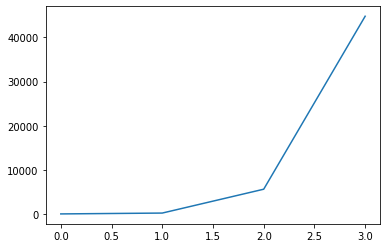

In [51]:
plt.plot(mean_arr_hash)
plt.show()

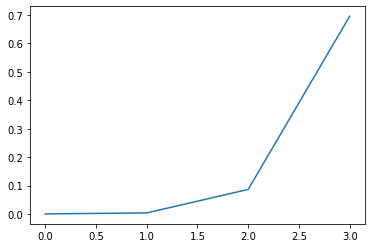

In [52]:
plt.plot(mean_arr_time)
plt.show()

In [53]:
diff_factor_1 = np.mean(hash_array_1)/np.mean(hash_array_0)
diff_factor_2 = np.mean(hash_array_2)/np.mean(hash_array_1)
diff_factor_3 = np.mean(hash_array_3)/np.mean(hash_array_2)
print("Factor of difficulty increase from 1 to 2: {}".format(diff_factor_1))
print("Factor of difficulty increase from 2 to 3: {}".format(diff_factor_2))
print("Factor of difficulty increase from 3 to 4: {}".format(diff_factor_3))

Factor of difficulty increase from 1 to 2: 12.91358024691358
Factor of difficulty increase from 2 to 3: 26.847036328871894
Factor of difficulty increase from 3 to 4: 7.97968449540631


**Question 6: This one is simple**

Look at the factor of difficulty increase from each level to the subsequent level, printed from the cell above.

What whould the factor of difficulty increase be for each level: **Your answer Here**

**Check Off**

If you have filled out all the skeleton code and put down your answers for the questions, let any of the instructor know and we will check you off!

If you cannot finish it this class, you have until next week's class to finish check off and earn points.
